In [1]:
##KNN regresion

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


from math import sqrt

In [3]:
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

In [4]:
df = pd.read_csv("train.csv")
df.fecha = pd.to_datetime(df.fecha)

In [5]:
df.info()
#antiguedad, habitaciones, metrostotales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [6]:
print("antiguedad: ", df['antiguedad'].isnull().sum())
print("habitaciones: ", df['habitaciones'].isnull().sum())
print("metrostotales: ", df['metrostotales'].isnull().sum())
print("precio: ", df['precio'].isnull().sum())


antiguedad:  43555
habitaciones:  22471
metrostotales:  51467
precio:  0


In [7]:
#No hace falta tirar filas por precio nulo.
#Solo eliminamos las filas a las que les faltan datos. No inventamos datos.

In [8]:
`
df.shape

(143820, 23)

In [9]:
df['year'] = df.fecha.dt.year
df['mes'] = df.fecha.dt.month
df['dia_del_mes'] = df.fecha.dt.day
df['dia_del_anio'] = df.fecha.dt.dayofyear

In [10]:
cols = ['antiguedad', 'habitaciones', 'metrostotales', 'precio']
df = df[cols]

normalized_df = (df - df.mean()) / (df.std())
normalized_df.head()

,antiguedad,habitaciones,metrostotales,precio
1,0.219987,0.048068,0.125665,0.615677
2,-0.321594,0.048068,-0.027846,-0.576503
3,-0.754858,-1.058576,-1.113387,-0.849710
4,0.219987,-1.058576,-0.806365,-0.601340
5,-0.321594,-1.058576,-0.861191,-0.626177


In [11]:
df.shape

(143820, 4)

In [12]:
X = normalized_df.drop(['precio'],axis = 1)
y = normalized_df['precio']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print()
print("y_train shape:", y_train.shape)
print("y_test  shape:", y_test.shape)


X_train shape: (107865, 3)
X_test  shape: (35955, 3)

y_train shape: (107865,)
y_test  shape: (35955,)


In [15]:
X_train.head()

,antiguedad,habitaciones,metrostotales
160190,3.469469,4.474647,0.531373
93139,1.303147,0.048068,0.564268
52408,1.303147,0.048068,-0.948911
162676,-0.321594,-1.058576,-0.795400
52904,-0.863174,0.048068,0.673919


In [16]:
# %%time
# model = KNeighborsRegressor(n_neighbors=100)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# print(RMSLE(y_test, pred))
# print()

In [17]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor(n_neighbors=7)
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE.
    return RMSLE(test_df[target_col], predicted_labels)

In [18]:
# Lets test a couple of predictors
print('antiguedad: ', knn_train_test('antiguedad', 'precio', normalized_df))
print('habitaciones: ', knn_train_test('habitaciones', 'precio', normalized_df))
print('metrostotales: ', knn_train_test('metrostotales', 'precio', normalized_df))

/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


antiguedad:  1.4004509963243403


/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


habitaciones:  1.2513461711054212
metrostotales:  1.0966583171978337


/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [19]:
def knn_train_test_new(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5,15,30,45,70]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        k_rmses[k] = RMSLE(test_df[target_col], predicted_labels)
    return k_rmses


In [20]:
k_rmse_results = {}

# For each column from above, train a model, return RMSE value
# and add to the dictionary `rmse_results`.
variables = ['antiguedad', 'habitaciones', 'metrostotales']
for var in variables:
    rmse_val = knn_train_test_new(var, 'precio', normalized_df)
    k_rmse_results[var] = rmse_val

k_rmse_results

/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/pablocruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: Runt

{'antiguedad': {5: 1.447527723313633,
  15: 1.3652671410642812,
  30: 1.3767533190164245,
  45: 1.3695396940804996,
  70: 1.359014543280893},
 'habitaciones': {5: 1.2265639064486074,
  15: 1.278730340574471,
  30: 1.193798283841133,
  45: 1.2243080499645076,
  70: 1.2173726523454673},
 'metrostotales': {5: 1.110210237446634,
  15: 1.0804555324446552,
  30: 1.08283836224598,
  45: 1.0783207579648892,
  70: 1.0735651699008368}}

In [21]:
def knn_train_test_mult(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
#     elegimos el mejor K acorde a lo anterior
    k_values = [15]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [22]:
#elegimos los 2 mejores features
train_cols_2 = ['metrostotales', 'habitaciones']
train_cols_3 = ['metrostotales', 'habitaciones', 'antiguedad']

k_rmse_results = {}

rmse_val = knn_train_test_mult(train_cols_2, 'precio', normalized_df)
k_rmse_results["two best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_3, 'precio', normalized_df)
k_rmse_results["three best features"] = rmse_val

k_rmse_results

{'two best features': {15: 0.8166771020568897},
 'three best features': {15: 0.807975348373001}}

In [23]:
def knn_train_test_mult2(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = list(range(1,400,16))
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
            knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [24]:
#elegimos los 2 mejores features
train_cols_2 = ['metrostotales', 'habitaciones']
train_cols_3 = ['metrostotales', 'habitaciones', 'antiguedad']

k_rmse_results = {}

rmse_val = knn_train_test_mult2(train_cols_2, 'precio', normalized_df)
k_rmse_results["two best features"] = rmse_val
rmse_val = knn_train_test_mult2(train_cols_3, 'precio', normalized_df)
k_rmse_results["three best features"] = rmse_val

k_rmse_results

{'two best features': {1: 1.086224508044417,
  17: 0.8135363195961675,
  33: 0.8027577468840612,
  49: 0.8001988690387047,
  65: 0.7980448124104215,
  81: 0.7968765486193341,
  97: 0.7967200587912656,
  113: 0.7970453686866177,
  129: 0.7970901826862387,
  145: 0.7970334490598661,
  161: 0.7969287964562125,
  177: 0.7969877286902859,
  193: 0.7969043939204019,
  209: 0.7968584605509186,
  225: 0.7971219593572193,
  241: 0.7972767984370838,
  257: 0.7974986960469129,
  273: 0.7975440782601783,
  289: 0.7976767884086381,
  305: 0.7977264926216834,
  321: 0.7977609260963877,
  337: 0.7980041481840596,
  353: 0.7981379812715397,
  369: 0.7981194271402716,
  385: 0.7982145780981796},
 'three best features': {1: 1.1010291912898265,
  17: 0.8059084835992171,
  33: 0.7975342878514314,
  49: 0.7944050525006101,
  65: 0.7930145281480286,
  81: 0.7928193706093903,
  97: 0.7929506703666933,
  113: 0.7929095627829322,
  129: 0.7927876751255116,
  145: 0.7927770157242812,
  161: 0.7928987829451087,


Text(0,0.5,'RMSE')

<Figure size 432x288 with 0 Axes>

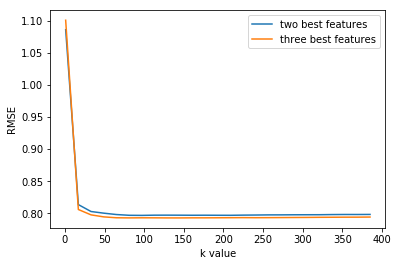

In [25]:
import matplotlib.pyplot as plt
% matplotlib inline

dataf = pd.DataFrame.from_dict(k_rmse_results)
dataf
plt.figure()
ax = dataf.plot(secondary_y=['A', 'B'])
plt.xlabel('k value')
plt.ylabel('RMSE')